In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [9]:
df = pd.read_csv("tweets_labeled.csv")

In [10]:
df.head()

,tweet_id,tweet,date,label
0,1606767075984375808,Berk Ali (kedim) seni çok özledim. Ölmek için ...,2022-12-24 21:41:37+00:00,1
1,1537178207677448193,"Yani, öylesine ciddiye alacaksın ki yaşamayı, ...",2022-06-15 21:00:18+00:00,1
2,1536458790802972673,saçlarının gölgesinde\nölmek ne güzeldi,2022-06-13 21:21:36+00:00,1
3,1495413883166760960,"Öyle güzel baktın ki, gözlerime\nsevmek değil ...",2022-02-20 15:03:47+00:00,1
4,1490420667614904334,sevmek biri için ölmek değil her şeye rağmen y...,2022-02-06 20:22:32+00:00,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  12960 non-null  int64 
 1   tweet     12959 non-null  object
 2   date      12960 non-null  object
 3   label     12960 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 405.1+ KB


## Data Cleaning and Future Extraction

#### Cleaning
1. localize "date" column and drop the date column
2. change all tweets to lower case
3. look up for aphostrophes, short words and emoticons
4. replace special characters and number with space
5. remove tweets with one word

##### 1. localize "date" column and drop the date column

In [19]:
df["date"] = pd.to_datetime(df["date"])
df['date'] = df['date'].dt.tz_localize(None)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       12960 non-null  int64         
 1   tweet          12959 non-null  object        
 2   date           12960 non-null  datetime64[ns]
 3   label          12960 non-null  int64         
 4   month          12960 non-null  object        
 5   seasons        12960 non-null  object        
 6   days           12960 non-null  object        
 7   time_interval  12960 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 810.1+ KB


now that we have new columns such as mont seasons days and time_interval which is a 4-hour interval between time of the tweet we can say that we future extracted. Now we need to clean the data

In [25]:
df.drop("date",axis = 1,inplace = True)

##### 2. change all tweets to lower case

Now we can also say that data is cleaned. From now on we will be focusing on EDA of the data with questions like in what time period was the users posted the most negative tweets and so on.

## Exploratory Data Analysis

#### Questions
1. What is the ratio of the positive negative and natural tweets

1. What is the ratio of the positive negative and natural tweets

In [31]:
ratio = df["label"].value_counts()
ratio

label
 0    8449
-1    2904
 1    1607
Name: count, dtype: int64

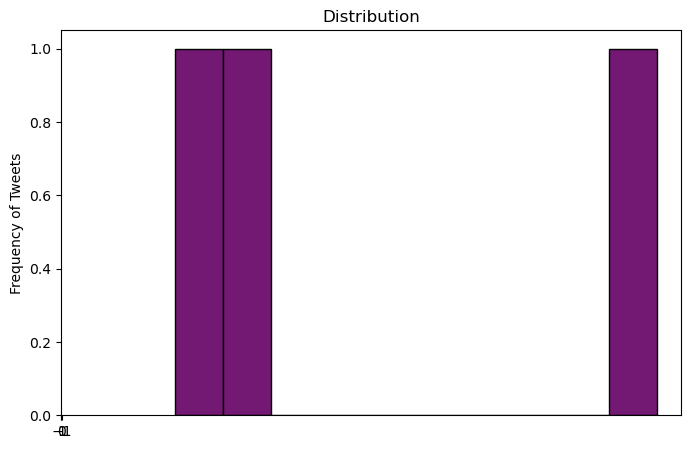

In [32]:
ratio = df["label"].value_counts()

plt.figure(figsize = (8,5),dpi = 100)
plt.hist(ratio,color = "#731873",edgecolor = "k")

plt.xticks([-1,0,1])

plt.ylabel('Frequency of Tweets')
plt.xlabel('')
plt.title('Distribution')
plt.show()

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mustafa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('turkish'))
stop_words

{'acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'en',
 'eğer',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'ile',
 'ise',
 'için',
 'kez',
 'ki',
 'kim',
 'mu',
 'mü',
 'mı',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niye',
 'niçin',
 'o',
 'sanki',
 'siz',
 'tüm',
 've',
 'veya',
 'ya',
 'yani',
 'çok',
 'çünkü',
 'şey',
 'şu'}